### **Introduction**


The dataset analyzed in this project consists of 303 rows and 14 columns, capturing various clinical and demographic details of patients with heart disease. The primary focus was to explore the relationship between five selected variables and the severity of heart disease, as indicated by a sixth column coded on a scale of 0 to 4. This scale ranges from 0, indicating no heart disease, to 4, representing the most severe form of the condition. The breakdown of heart disease severity in this dataset is as follows: 54.13% of patients have no heart disease (target = 0), while 45.87% of patients fall into categories 1 through 4, indicating varying levels of heart disease severity.

The selected variables for this analysis are the number of major blood vessels colored by fluoroscopy (ca), exercise-induced angina (exang), resting blood pressure (trestbps), fasting blood sugar levels greater than 120 mg/dl (fbs), and cholesterol levels (chol). This study aims to determine which of these factors are significant predictors of heart disease severity. This dataset is notably small in scale and results are obtained with this as background. 



#### **Loading and Displaying the Heart Disease Dataset**

We begin by importing the pandas library as pd for  data manipulation and analysis capabilities. The correct file path to the heart disease dataset is specified. We define the column names as per the dataset description.  Using the `pd.read_csv()` function, we load the dataset into a pandas DataFrame, specifying the file path, no header, and the defined column names. Finally, we display the first few rows of the dataset using `print(df.head())` to verify that the data has been loaded correctly.

The columns we will be focusing on in our analysis are as follows:
- `trestbps`: Resting systolic blood pressure (in mm Hg on admission to the hospital). It is an integer feature representing the patient's systolic blood pressure at rest.
- `chol`: Serum cholesterol in mg/dl. This integer feature measures the total cholesterol level in the blood.
- `fbs`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false). This categorical feature indicates whether the patient's fasting blood sugar level is greater than 120 mg/dl.
- `exang`: Exercise induced angina (1 = yes; 0 = no). This categorical feature indicates whether the patient experienced angina induced by exercise.
- `ca`: Number of major vessels (0-3) colored by fluoroscopy. This integer feature represents the number of major vessels with significant blockages as identified by fluoroscopy.
- `target`: Diagnosis of heart disease (angiographic disease status), with 0 indicating no presence of heart disease (< 50% diameter narrowing), and 1-4 indicating the presence and increasing severity of heart disease (> 50% diameter narrowing).

By analyzing these columns, we aim to explore the statistical relationships between different heart disease gradations and these specific health metrics.









In [1]:
import pandas as pd

# Correct file path
file_path = '/Users/steventuschman/Downloads/heart+disease/processed.cleveland.data'

# Define column names as per the dataset description
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)

# Display the first few rows of the dataset
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


#### **Distribution of Heart Disease Severity Among Patients**


The following code calculates the percentage of patients with each target value (0, 1, 2, 3, and 4) in the dataset, and also computes the total percentage of patients with target values 1-4. The analysis reveals the distribution of heart disease severity among the patients in the dataset. Specifically, 54.13% of the patients have a target value of 0, indicating no presence of heart disease. The percentages for patients with target values 1, 2, 3, and 4 are 18.15%, 11.88%, 11.55%, and 4.29%, respectively. Combining these, we find that 45.87% of the patients exhibit some degree of heart disease (target values 1-4), highlighting a significant portion of the dataset with varying levels of disease severity.


In [2]:
# Calculate the value counts for the 'target' column
target_counts = df['target'].value_counts()

# Calculate the total number of patients
total_patients = len(df)

# Calculate the percentage of patients for each target value
target_percentages = (target_counts / total_patients) * 100

# Print the percentage of patients for each target value
for value, percentage in target_percentages.items():
    print(f"Percentage of patients with target = {value}: {percentage:.2f}%")

# Calculate the total percentage of patients with target values 1-4
total_1_to_4 = target_percentages[1] + target_percentages[2] + target_percentages[3] + target_percentages[4]

# Print the total percentage of patients with target values 1-4
print(f"Total percentage of patients with target = 1-4: {total_1_to_4:.2f}%")


Percentage of patients with target = 0: 54.13%
Percentage of patients with target = 1: 18.15%
Percentage of patients with target = 2: 11.88%
Percentage of patients with target = 3: 11.55%
Percentage of patients with target = 4: 4.29%
Total percentage of patients with target = 1-4: 45.87%


 #### **Calculating the Average Number of Major Vessels Colored by Fluoroscopy**

 
 The code then calculates the average number of blood vessels colored by fluoroscopy for each heart disease severity category (`target`) using the `groupby` method followed by the `mean` method. Finally, the results are printed, displaying the average number of colored vessels for each target category, which represents different gradations of heart disease severity. The analysis reveals the following average number of major vessels colored by fluoroscopy for each heart disease severity category:

Target = 0: 0.27
Target = 1: 0.74
Target = 2: 1.22
Target = 3: 1.46
Target = 4: 1.69

These results indicate a strong correlation between the number of major vessels colored by fluoroscopy and the severity of heart disease. As the target value increases, indicating greater severity of heart disease, the average number of affected vessels also increases. This trend is clinically significant as it suggests that the extent of vessel blockage, as detected by fluoroscopy, can serve as a reliable indicator of heart disease severity. This information can be critical in the diagnosis and management of patients with varying levels of heart disease, aiding in the determination of appropriate treatment strategies.

In [6]:
import pandas as pd

# Correct file path
file_path = '/Users/steventuschman/Downloads/heart+disease/processed.cleveland.data'

# Define column names as per the dataset description
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)

# Convert the 'ca' column to numeric values, coercing errors to NaN
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')

# Calculate the average number of blood vessels colored by fluoroscopy for each target category
average_ca_per_target = df.groupby('target')['ca'].mean()

# Print the results
print("Average number of blood vessels colored by fluoroscopy per target category:")
print(average_ca_per_target)


Average number of blood vessels colored by fluoroscopy per target category:
target
0    0.273292
1    0.740741
2    1.222222
3    1.457143
4    1.692308
Name: ca, dtype: float64


#### **Analysis of Exercise-Induced Angina Across Heart Disease Severity Categories**

This analysis reveals the following percentages of patients with a positive value for exercise-induced angina (exang = 1) in each heart disease severity category:

Target = 0: 14.02%
Target = 1: 45.45%
Target = 2: 61.11%
Target = 3: 65.71%
Target = 4: 46.15%

These results indicate a correlation between the presence of exercise-induced angina and the severity of heart disease. Specifically, only 14.02% of patients with no heart disease (target = 0) exhibit exercise-induced angina. In contrast, a significantly higher percentage of patients with varying degrees of heart disease severity (targets 1-4) have exercise-induced angina, with the highest percentages observed in the target = 2 (61.11%) and target = 3 (65.71%) categories. This trend suggests that exercise-induced angina is more prevalent in patients with more severe forms of heart disease, underscoring its potential as an important clinical indicator for assessing heart disease severity.

In [7]:
# Calculate the value counts for 'exang' within each target category
exang_counts = df.groupby('target')['exang'].value_counts(normalize=True).unstack()

# Fill NaN values with 0 for categories that may not have all values of 'exang'
exang_counts = exang_counts.fillna(0)

# Extract the percentages for patients with exang = 1 (positive value)
exang_positive_percentages = exang_counts.loc[:, 1] * 100

# Print the results
print("Percentage of patients with a positive value for exercise-induced angina (exang = 1) per heart disease category:")
print(exang_positive_percentages)


Percentage of patients with a positive value for exercise-induced angina (exang = 1) per heart disease category:
target
0    14.024390
1    45.454545
2    61.111111
3    65.714286
4    46.153846
Name: 1.0, dtype: float64


#### **Analysis of Fasting Blood Glucose Over 120 Across Heart Disease Severity Categories**

The analysis reveals the following percentages of patients with a positive value for fasting blood sugar greater than 120 mg/dl (fbs = 1) in each heart disease severity category:

Target = 0: 14.02%
Target = 1: 7.27%
Target = 2: 25.00%
Target = 3: 22.86%
Target = 4: 7.69%

These results show that the percentage of patients with high fasting blood sugar levels varies across different heart disease severity categories. Interestingly, only 14.02% of patients with no heart disease (target = 0) have high fasting blood sugar. However, the highest percentage is observed in the target = 2 category, with 25.00% of patients having high fasting blood sugar. This is followed by the target = 3 category at 22.86%. The percentages in the target = 1 and target = 4 categories are relatively lower, at 7.27% and 7.69%, respectively. This suggests a weak or no clear relationship between high fasting blood sugar levels and heart disease severity, as the percentages do not show a consistent increasing trend with higher heart disease severity.


In [8]:
# Calculate the value counts for 'fbs' within each target category
fbs_counts = df.groupby('target')['fbs'].value_counts(normalize=True).unstack()

# Fill NaN values with 0 for categories that may not have all values of 'fbs'
fbs_counts = fbs_counts.fillna(0)

# Extract the percentages for patients with fbs = 1 (positive value)
fbs_positive_percentages = fbs_counts.loc[:, 1] * 100

# Print the results
print("Percentage of patients with a positive value for fasting blood sugar > 120 mg/dl (fbs = 1) per heart disease category:")
print(fbs_positive_percentages)


Percentage of patients with a positive value for fasting blood sugar > 120 mg/dl (fbs = 1) per heart disease category:
target
0    14.024390
1     7.272727
2    25.000000
3    22.857143
4     7.692308
Name: 1.0, dtype: float64


#### **Analysis of Resting Blood Pressure Across Heart Disease Severity Categories**

This analysis reveals the following average resting blood pressure (trestbps) values for each heart disease severity category:

Target = 0: 129.25 mm Hg
Target = 1: 133.25 mm Hg
Target = 2: 134.19 mm Hg
Target = 3: 135.46 mm Hg
Target = 4: 138.77 mm Hg

These results show that the average resting blood pressure tends to increase with the severity of heart disease. Patients with no heart disease (target = 0) have an average resting blood pressure of 129.25 mm Hg, while those with the most severe heart disease (target = 4) have a higher average resting blood pressure of 138.77 mm Hg. This increasing trend suggests that higher resting blood pressure is associated with more severe heart disease, which aligns with clinical understanding that hypertension is a risk factor for the development and progression of cardiovascular diseases. 

In [9]:
import pandas as pd

# Correct file path
file_path = '/Users/steventuschman/Downloads/heart+disease/processed.cleveland.data'

# Define column names as per the dataset description
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)

# Calculate the average resting blood pressure for each target category
average_trestbps_per_target = df.groupby('target')['trestbps'].mean()

# Print the results
print("Average resting blood pressure (trestbps) per heart disease category:")
print(average_trestbps_per_target)


Average resting blood pressure (trestbps) per heart disease category:
target
0    129.250000
1    133.254545
2    134.194444
3    135.457143
4    138.769231
Name: trestbps, dtype: float64


#### **Analysis of Cholesterol Levels Across Heart Disease Severity Categories**

The analysis reveals the following average cholesterol (chol) values for each heart disease severity category:

Target = 0: 242.64 mg/dl
Target = 1: 249.11 mg/dl
Target = 2: 259.28 mg/dl
Target = 3: 246.46 mg/dl
Target = 4: 253.38 mg/dl

These results indicate that the average cholesterol levels vary across different heart disease severity categories. Patients with no heart disease (target = 0) have an average cholesterol level of 242.64 mg/dl. The highest average cholesterol levels are observed in the target = 2 category, with 259.28 mg/dl, followed by the target = 1 and target = 4 categories at 249.11 mg/dl and 253.38 mg/dl, respectively. The target = 3 category has a slightly lower average cholesterol level of 246.46 mg/dl.

Overall, these findings do not show a significant linear relationship between cholesterol levels and the severity of heart disease.\

In [10]:
import pandas as pd

# Correct file path
file_path = '/Users/steventuschman/Downloads/heart+disease/processed.cleveland.data'

# Define column names as per the dataset description
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)

# Calculate the average cholesterol for each target category
average_chol_per_target = df.groupby('target')['chol'].mean()

# Print the results
print("Average cholesterol (chol) per heart disease category:")
print(average_chol_per_target)


Average cholesterol (chol) per heart disease category:
target
0    242.640244
1    249.109091
2    259.277778
3    246.457143
4    253.384615
Name: chol, dtype: float64


#### **Comprehensive Visualization of Relationships Between Heart Disease Severity and Key Variables**

The code begins by loading the heart disease dataset into a pandas DataFrame and replacing any occurrences of the placeholder '?' with NaN values to handle missing data. It then converts relevant columns to numeric values, ensuring that any errors in conversion result in NaN values, thereby maintaining data integrity.

The first set of visualizations are scatter plots with trend lines, created using seaborn's regplot function. These scatter plots illustrate the relationship between heart disease severity (target) and three numerical variables: resting blood pressure (trestbps), cholesterol (chol), and the number of major vessels colored by fluoroscopy (ca). The trend lines help to highlight any potential linear relationships between these variables and heart disease severity.

 Bar plots are generated to examine the relationships between heart disease severity and two binary categorical variables: fasting blood sugar levels (fbs) and exercise-induced angina (exang). Using seaborn's barplot function, these bar plots display the proportions of patients with high fasting blood sugar and those with exercise-induced angina across different categories of heart disease severity.

Overall, the visualizations provide a comprehensive analysis of the relationships between various factors and heart disease severity, making it easier to identify patterns and trends in the data.








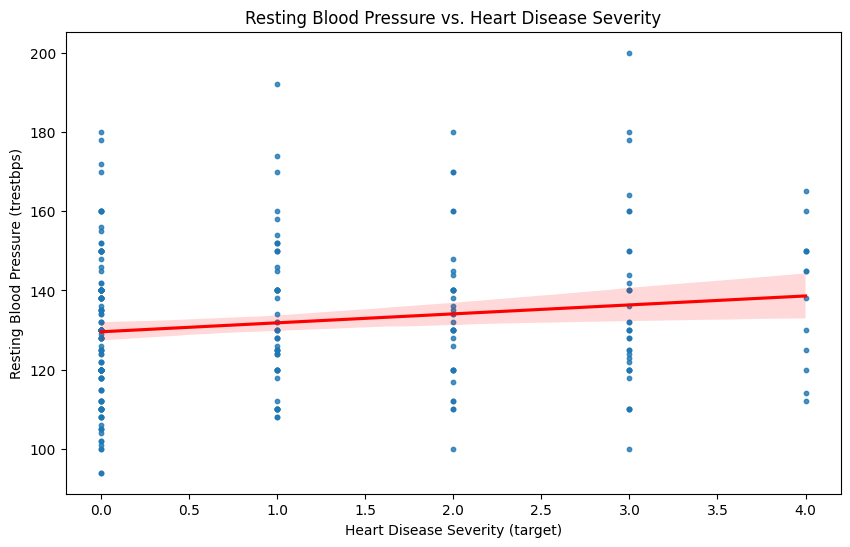

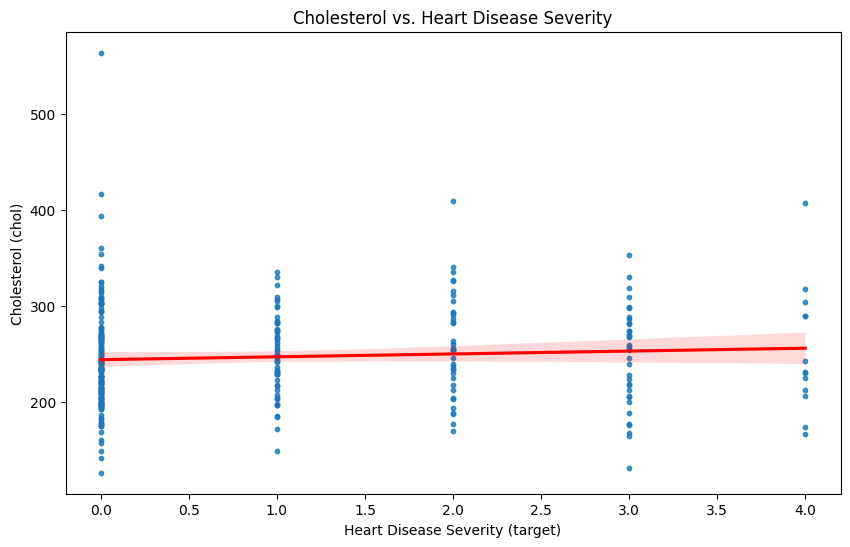

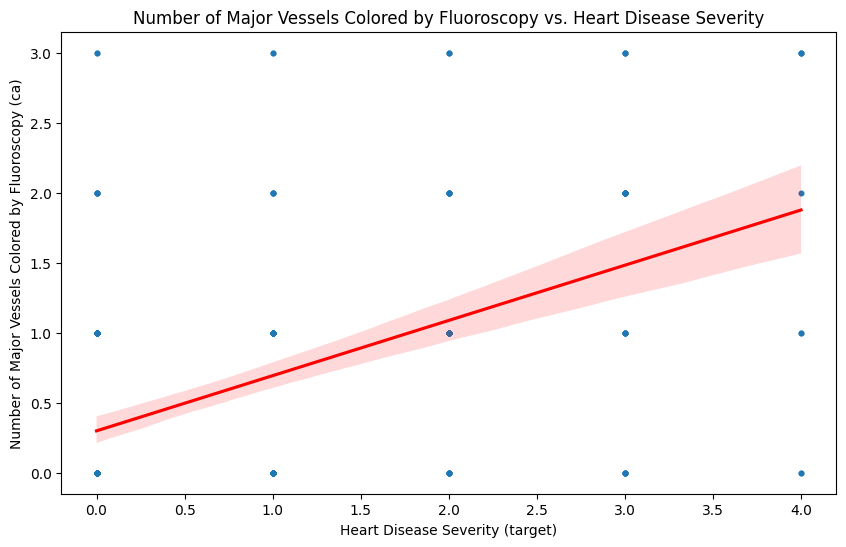

/var/folders/66/jr4_k8xd6rx5c13c4jgcwg200000gn/T/ipykernel_78440/3165326288.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='target', y='fbs', data=df, ci=None)


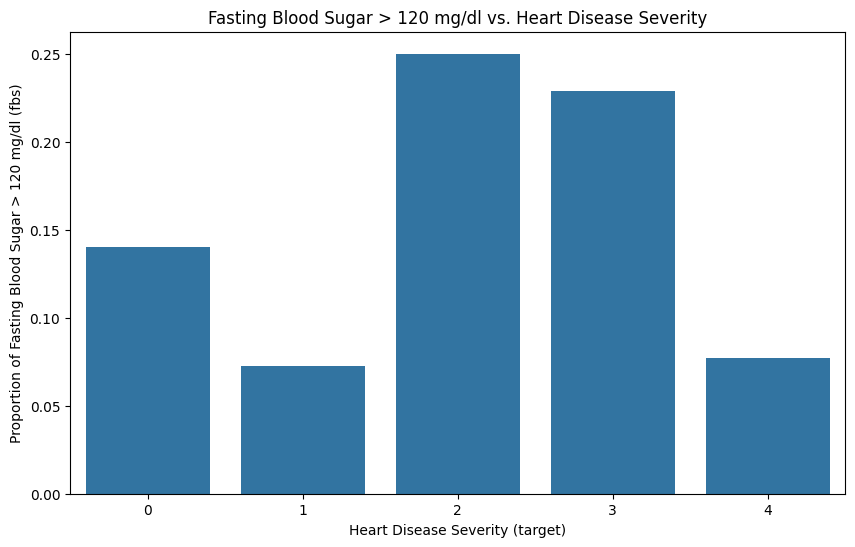

/var/folders/66/jr4_k8xd6rx5c13c4jgcwg200000gn/T/ipykernel_78440/3165326288.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='target', y='exang', data=df, ci=None)


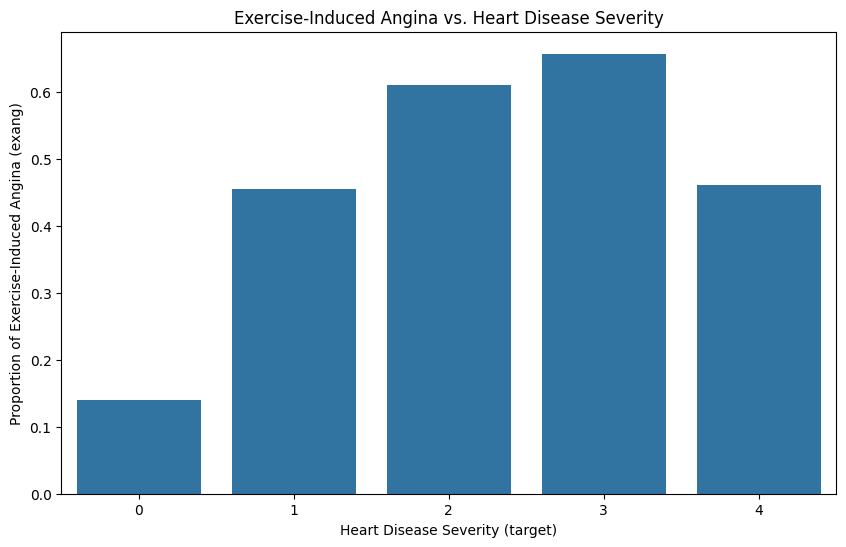

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path
file_path = '/Users/steventuschman/Downloads/heart+disease/processed.cleveland.data'

# Define column names as per the dataset description
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path, header=None, names=column_names)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Convert relevant columns to numeric, coercing errors to NaN
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Scatter plot for trestbps (resting blood pressure)
plt.figure(figsize=(10, 6))
sns.regplot(x='target', y='trestbps', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Resting Blood Pressure vs. Heart Disease Severity')
plt.xlabel('Heart Disease Severity (target)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

# Scatter plot for chol (cholesterol)
plt.figure(figsize=(10, 6))
sns.regplot(x='target', y='chol', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Cholesterol vs. Heart Disease Severity')
plt.xlabel('Heart Disease Severity (target)')
plt.ylabel('Cholesterol (chol)')
plt.show()

# Scatter plot for ca (number of major vessels colored by fluoroscopy)
plt.figure(figsize=(10, 6))
sns.regplot(x='target', y='ca', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Number of Major Vessels Colored by Fluoroscopy vs. Heart Disease Severity')
plt.xlabel('Heart Disease Severity (target)')
plt.ylabel('Number of Major Vessels Colored by Fluoroscopy (ca)')
plt.show()

# Bar plot for fbs (fasting blood sugar)
plt.figure(figsize=(10, 6))
sns.barplot(x='target', y='fbs', data=df, ci=None)
plt.title('Fasting Blood Sugar > 120 mg/dl vs. Heart Disease Severity')
plt.xlabel('Heart Disease Severity (target)')
plt.ylabel('Proportion of Fasting Blood Sugar > 120 mg/dl (fbs)')
plt.show()

# Bar plot for exang (exercise-induced angina)
plt.figure(figsize=(10, 6))
sns.barplot(x='target', y='exang', data=df, ci=None)
plt.title('Exercise-Induced Angina vs. Heart Disease Severity')
plt.xlabel('Heart Disease Severity (target)')
plt.ylabel('Proportion of Exercise-Induced Angina (exang)')
plt.show()


### **Conclusion**


The analysis revealed varying degrees of correlation between the selected variables and heart disease severity:

Number of Major Blood Vessels Colored by Fluoroscopy (ca): This variable showed a very strong and significant linear relationship with the severity of heart disease. The average number of blood vessels colored by fluoroscopy increased consistently with the severity of heart disease, from 0.27 for target = 0 to 1.69 for target = 4. The scatter plot confirms this strong association, highlighting its potential as a crucial diagnostic indicator.

Exercise-Induced Angina (exang): There is a strong and significant relationship between exercise-induced angina and heart disease severity. The percentage of patients with exercise-induced angina increased markedly from 14.02% in the no heart disease category (target = 0) to over 60% in categories 2 and 3. The bar graph clearly illustrates this important relationship, underscoring the relevance of exercise-induced angina in assessing heart disease severity.

Resting Blood Pressure (trestbps): Although there is a definite linear relationship between resting blood pressure and heart disease severity, the differences are relatively small. The average resting blood pressure increases from 129.25 mm Hg in the no heart disease category to 138.77 mm Hg in the most severe category. While this trend is observable, it is less pronounced compared to the fluoroscopy and angina data, indicating a weaker predictive value.

Fasting Blood Sugar (fbs): The analysis shows no useful relationship between fasting blood sugar levels greater than 120 mg/dl and heart disease severity. The proportions of patients with high fasting blood sugar are inconsistent across the heart disease categories, suggesting that this binary categorization may not be effective in this context. This finding calls into question the utility of this threshold for predicting heart disease severity.

Cholesterol Levels (chol): Surprisingly, cholesterol levels do not show a significant relationship with heart disease severity. The average cholesterol levels vary across the categories, but without a clear pattern. This lack of correlation is a notable finding, indicating that cholesterol may not be as reliable a predictor of heart disease severity as previously thought. This result warrants further investigation with larger datasets to confirm these observations.

Overall, this study highlights the significant predictive value of the number of major blood vessels colored by fluoroscopy and exercise-induced angina in determining heart disease severity. Resting blood pressure also shows a relationship, albeit weaker. In contrast, fasting blood sugar and cholesterol levels do not provide meaningful correlations in this dataset. Follow up studies should include more defined data for fasting blood glucose levels thus allowing a more comprehensive analysis. The cholesterol relationship warrants further analysis as the data pattern strongly indicates a non relationship in this analysis. 